# Entrenamiento de red feedforward

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ymeza@ubiobio.cl

**Fecha de Creación:** Noviembre de 2024  
**Versión:** 1.0  

---

## Descripción

En este notebook se entrenan redes Feed-Forward

Usa keras para, de manera muy fácil entrenar redes feed-forward, usando descenso estocástico de gradiente.

Contiene ejercicios para resolver

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (1.26.4)
- matplotlib (3.7.1)
- tensorflow (2.17.1)


Para verificar la versión instalada ejecutar usando el nombre del paquete del cual quieres saber la versión; por ejemplo, si quieres saber la versión de sklearn usas:

```bash
import numpy
print(numpy.__version__)
````

In [2]:
# Importa librerías necesarias
import numpy as np
import tensorflow as tf

from tensorflow import keras
from matplotlib import pyplot as plt
from time import time

In [3]:
# Setea los seed para números random

np.random.seed(30)
tf.random.set_seed(30)

In [4]:
# Carga los datos de entrenamiento de MNIST

(imgs, labs), _ = keras.datasets.mnist.load_data()
print(imgs.shape)
print(labs.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28)
(60000,)


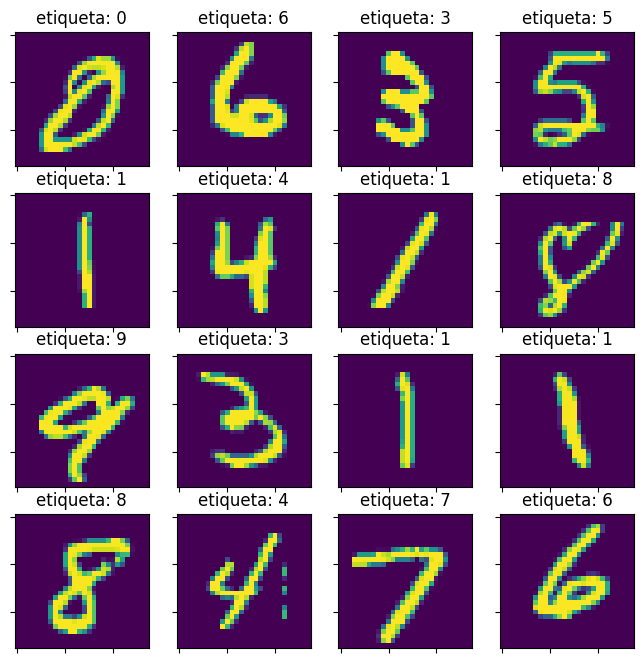

In [5]:
# Muestra una grilla de ejemplos (al azar)

h = 4 # alto de la grilla
w = 4 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(2*h,2*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    axs[i,j].set_title("etiqueta: " + str(labs[ex]))
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].grid(False)
    axs[i,j].imshow(imgs[ex])

In [6]:
# Transforma los datos para el entrenamiento

# Los X's se cambian a vectores de una dimension y luego se normaliza
X = imgs.reshape(60000,28*28)
X = X / 255
print(X.shape)

# Los Y's se cambian a vectores de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape)

(60000, 784)
(60000, 10)


In [7]:
# Cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

60000 784 10


In [8]:
# Tamaños de capas escondidas

h1 = 64
h2 = 32

In [9]:
# Mi red feed-forward

red = keras.Sequential(name="Mi_primera_red")
red.add(keras.layers.Input(shape=(N,)))
red.add(keras.layers.Dense(h1, activation='relu', name='primera_capa'))
red.add(keras.layers.Dense(h2, activation='relu', name='segunda_capa'))
red.add(keras.layers.Dense(C, activation='softmax', name='capa_de_salida'))

red.summary()

Model: "Mi_primera_red"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ primera_capa (Dense)            │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ segunda_capa (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ capa_de_salida (Dense)          │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

**¿Cómo se calcula la cantidad de parámetros de cada capa?**


---


+ Para la primera capa: $50240 = 28*28*64 + 64$
+ Para la segunda capa: $2080 = 32*64 + 32$
+ Para la capa de salida: $330 = 32*10 + 10$

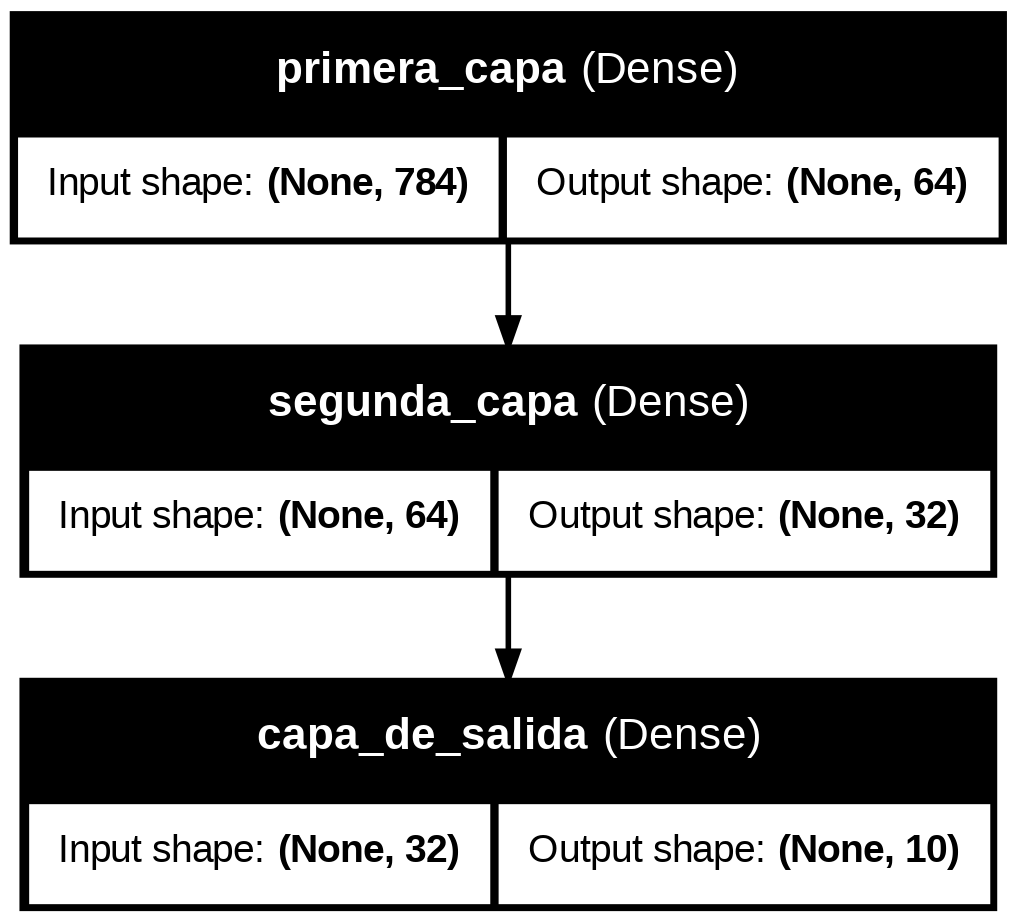

In [10]:
tf.keras.utils.plot_model(red, to_file='red_plot.png', show_shapes=True, show_layer_names=True)

# Compilación de la red

Ahora se **compila la red** para poder entrenar; eso se logra con `.compile`

Se requiere definir
+ La pérdida ("loss"), en este caso, "categorical_crossentropy"
+ El algoritmo de optimización ("optimizer"), en este caso "sgd"

También es posible agregar una lista de métricas ("metrics"). En este caso se agrega "accuracy"

In [11]:
red.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

# Entrenamiento de la red

Entrena simplemente haciendo `.fit` y entregando los inputs

Es posible definir también:

+ La cantidad de épocas ("epochs"),
+ El tamaño del paquete de entrenamiento ("batch_size"), y
+ Otros parámetros que se revisan más adelante.


In [12]:
start_time = time()
h = red.fit(X, Y,
        epochs=5,
        batch_size=1,
       )
end_time = time()
print("Train time: %0.10f seconds." % (end_time - start_time))

Epoch 1/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 131s 2ms/step - accuracy: 0.8803 - loss: 0.3870
Epoch 2/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 129s 2ms/step - accuracy: 0.9586 - loss: 0.1352
Epoch 3/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 142s 2ms/step - accuracy: 0.9708 - loss: 0.0990
Epoch 4/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 128s 2ms/step - accuracy: 0.9752 - loss: 0.0813
Epoch 5/5
60000/60000 ━━━━━━━━━━━━━━━━━━━━ 127s 2ms/step - accuracy: 0.9782 - loss: 0.0731
Train time: 657.5958554745 seconds.


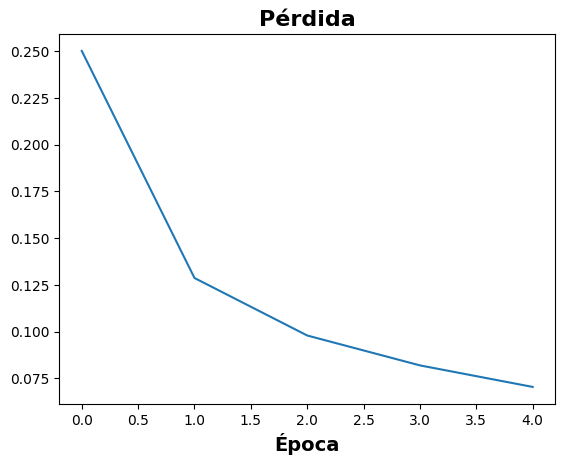

In [13]:
# Grafica la pérdida para cada época

plt.plot(h.history['loss'])
plt.title('Pérdida', fontsize = 16, fontweight="bold")
plt.xlabel('Época', fontsize = 14, fontweight="bold")
plt.show()


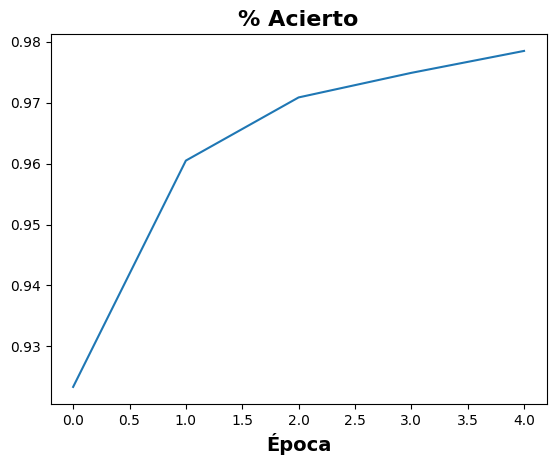

In [14]:
# Grafica el porcentaje de acierto para cada época

plt.plot(h.history['accuracy'])
plt.title('% Acierto', fontsize = 16, fontweight="bold")
plt.xlabel('Época', fontsize = 14, fontweight="bold")
plt.show()


# Predicciones

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


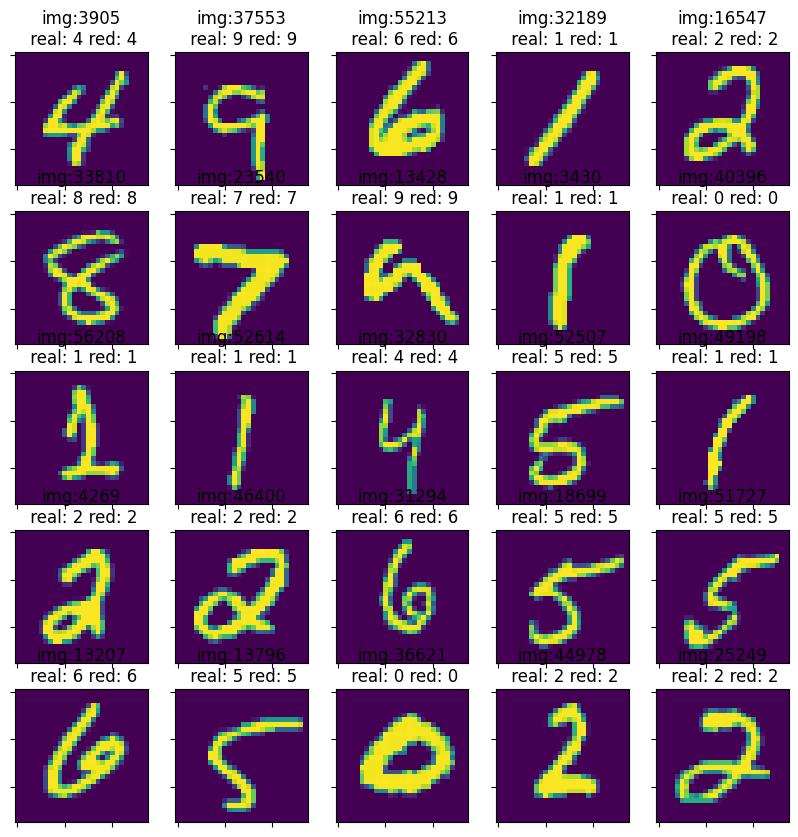

In [15]:
h = 5
w = 5

fig, axs = plt.subplots(h, w, figsize=(2*h,2*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    Xin = X[ex].reshape(1,28*28)
    Ypred = red.predict(Xin).reshape(10)
    lpred = np.argmax(Ypred)

    axs[i,j].set_title("img:" + str(ex) + "\n real: " + str(labs[ex]) + " red: " + str(lpred))
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].grid(False)
    axs[i,j].imshow(imgs[ex])

## Ejercicio 1: ¿Sin normalizar datos?

Elimina la parte del código anterior que normaliza los datos (donde dividimos por 255) y mira qué le pasa al entrenamiento. No tiene que escribir nuevo código, sólo saca esa parte y reentrena  la red (debes crear otra vez la red, compilarla y luego  hacer `fit`)

## Solución Ejercicio 1: ¿Sin normalizar datos?

In [ ]:
# Escribe tu código acá

## Ejercicio 2: Entrenando por más épocas

Entrena la red, esta vez por más épocas (pueba con 20 o 30). Para comenzar el entrenamiento desde 0 otra vez, debes reconstruir la red y luego ejecutar `.compile` otra vez (puedes copiar el código de arriba). Luego del entrenamiento, imprime la historia y compáralo con el resultado anterior.

Hazle cambios a la red o al entrenamiento para intentar mejorar aún más el acierto. Qué cambios podrían dar buenos resultados y pruébalos ¿Hasta qué acierto puedes llegar?

(IMPORTANTE: No olvides normalizar el input de la red otra vez)

In [ ]:
# Escribe tu código acá

# CIFAR10: Entrenando con datos más complejos

Entrenaremos una red para aprender los datos de [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html). Este es un conjunto de 50.000 imágenes de entrenamiento etiquetadas en 10 clases (0:avión, 1:automovil, 2:pájaro, 3:gato, 4:venado, 5:perro, 6:rana, 7:caballo, 8:barco, 9:camión).

Comenzaremos cargando los datos y mostrando algunos ejemplos

In [16]:
(imgs,labs), _ = keras.datasets.cifar10.load_data()
print(imgs.shape)
print(labs.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [17]:
# Lista de nombres para usar como etiquetas

nombres = ['avión', 'auto', 'pájaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camión']

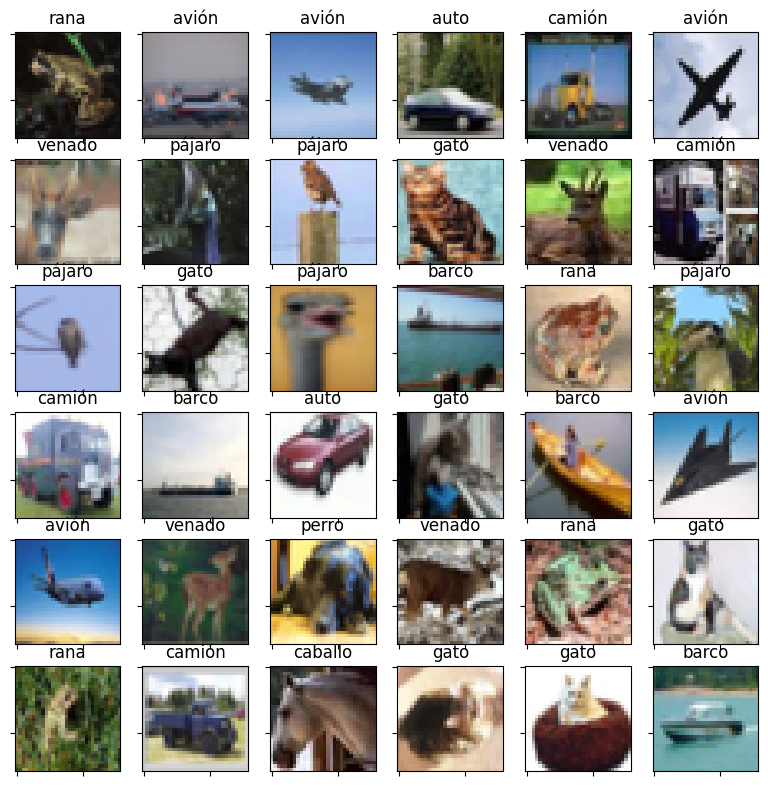

In [18]:
# Muestra una grilla de ejemplos (al azar)

h = 6 # alto de la grilla
w = 6 # ancho de la grilla
fig, axs = plt.subplots(h, w, figsize=(1.6*h,1.6*w))
for i in range(h):
  for j in range(w):
    ex = np.random.randint(len(imgs))
    axs[i,j].set_title(nombres[labs[ex][0]])
    axs[i,j].grid(False)
    axs[i,j].set_xticklabels([])
    axs[i,j].set_yticklabels([])
    axs[i,j].imshow(imgs[ex])

In [19]:
# Los X's se cambian a vectores de una dimension y luego se normalizan
X = imgs.reshape(50000,32*32*3)
X = X / 255
print(X.shape)

# los Y's se cambian a vectores de 10 componentes (one-hot)
Y = keras.utils.to_categorical(labs, 10)
print(Y.shape)

(50000, 3072)
(50000, 10)


In [20]:
# Cantidad de ejemplos, neuronas de entrada y neuronas de salida

M = X.shape[0]
N = X.shape[1]
C = Y.shape[1]

print(M,N,C)

50000 3072 10


##  Ejercicio 3: Entrenando con CIFAR10

Ahora usa todo lo que  has aprendido para crear una red y  entrenar con los datos de CIFAR10. Trata de crear una red que alcance al menos un  55% de acierto en los datos de entrenamiento. Esta parte requiere bastante más código! Al finalizar muestra  una grilla con las predicciones de tu red.

## Solución Ejercicio 3: Entrenando con CIFAR10

In [21]:
# Escribe tu código acá
h1 = 128
h2 = 64
h3 = 32

num_epocas = 20

# Creamos la red
red_CIFAR = keras.Sequential(name="Mi_red_CIFAR")
red_CIFAR.add(keras.layers.Input(shape=(N,)))
red_CIFAR.add(keras.layers.Dense(h1, activation="relu", name="primera_capa"))
red_CIFAR.add(keras.layers.Dense(h2, activation="relu", name="segunda_capa"))
red_CIFAR.add(keras.layers.Dense(h3, activation="relu", name="tercera_capa"))
red_CIFAR.add(keras.layers.Dense(C, activation="softmax", name="capa_salida"))

# Compila la red
red_CIFAR.compile(
    loss="categorical_crossentropy",
    optimizer="sgd",
    metrics=['accuracy'])
# Entrena la red
history = red_CIFAR.fit(X, Y, epochs = num_epocas, batch_size=5)

Epoch 1/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - accuracy: 0.2564 - loss: 1.9978
Epoch 2/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.3738 - loss: 1.7365
Epoch 3/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4097 - loss: 1.6539
Epoch 4/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.4290 - loss: 1.5968
Epoch 5/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4451 - loss: 1.5540
Epoch 6/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.4540 - loss: 1.5235
Epoch 7/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.4650 - loss: 1.4969
Epoch 8/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4730 - loss: 1.4751
Epoch 9/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4792 - loss: 1.4545
Epoch 10/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.4862 - loss: 1.4347
Epoch 11/20
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4915 - loss: 1.41